In [6]:
import joblib
import numpy as np
from sklearn.metrics import confusion_matrix

# Load results
results = joblib.load("model_results.pkl")
y_test = joblib.load("y_test.pkl")

# Extract predictions & probabilities
best_model_predictions = results['XGBoost']['Predictions']
best_model_probabilities = results['XGBoost']['Probabilities']

# Now your tier logic will work
cm = confusion_matrix(y_test, best_model_predictions)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:", cm)
print(f"TN={tn}, FP={fp}, FN={fn}, TP={tp}")


Confusion Matrix: [[12502   282]
 [  490 12294]]
TN=12502, FP=282, FN=490, TP=12294



 COMPREHENSIVE COST SAVINGS VALIDATION
FINANCIAL ASSUMPTIONS:
• Average direct cost per readmission: $15,000.00
• Estimated CMS penalty risk per readmission: $7,260.00
• TOTAL cost per readmission (Direct + CMS Risk): $22,260.00

INTERVENTION PROFILE:
• High-risk intervention cost: $800
• Medium-risk intervention cost: $200
• Low-risk follow-up cost: $50
• Intervention effectiveness: 22% (high), 15% (medium), 5% (low)

 MODEL PERFORMANCE SUMMARY:
True Negatives (TN): 12502 - Correctly identified low-risk patients
False Positives (FP): 282 - Intervention given, readmission didn't occur
False Negatives (FN): 490 - High-risk patients missed (no intervention)
True Positives (TP): 12294 - Correctly identified high-risk patients
Total patients: 25568, Actual readmissions: 12784

1. BASELINE SCENARIO (No Prediction Model):
   Expected Readmissions: 12784
   Total Cost (Direct + CMS Risk): $284,571,840.00

2. PREDICTION MODEL SCENARIO (Tiered Interventions):
   Very High Risk (n=11830):
     

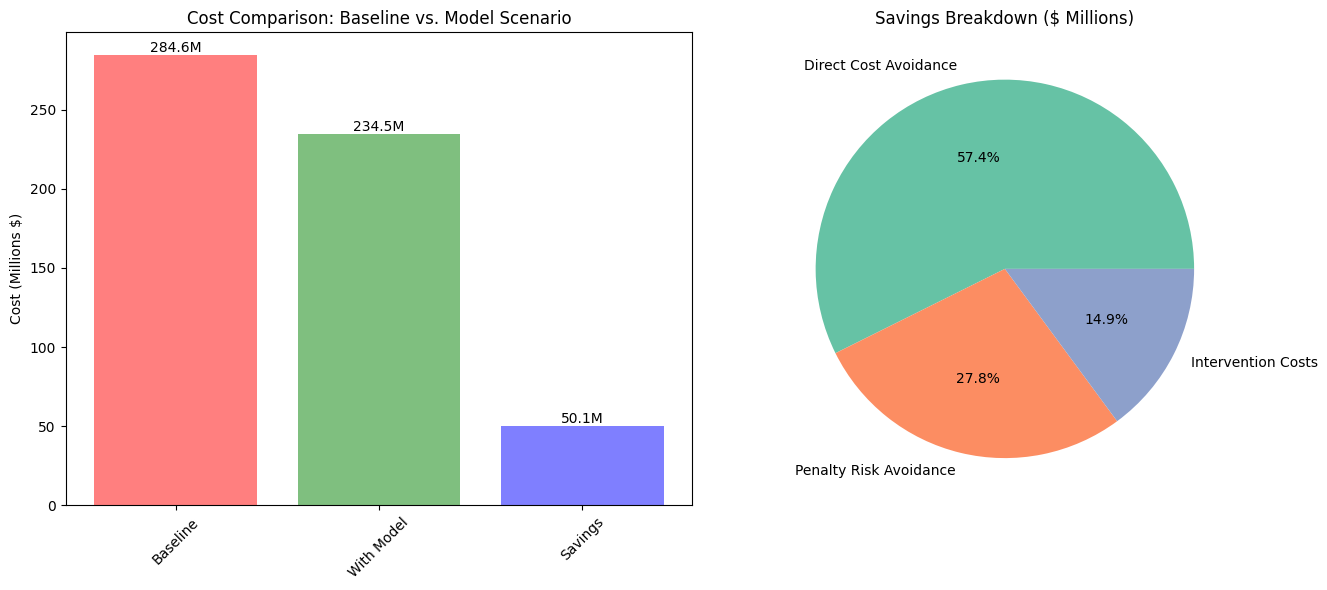


💡 KEY INSIGHTS:
• Current ROI: 471.6% - Excellent return on investment
• CMS penalty risk mitigation: $19,805,280.00
• Focus on enhancing interventions for very high-risk patients
• Consider implementing remote monitoring to boost effectiveness


In [7]:
# =====  COMPREHENSIVE COST SAVINGS VALIDATION =====
print(f"\n COMPREHENSIVE COST SAVINGS VALIDATION")
print("=" * 60)

# --- Cost Assumptions (Customize these with your hospital's data) ---
# Direct costs
AVERAGE_DIRECT_COST_PER_READMISSION = 15000  # Hospital's cost to treat a readmission

# CMS penalty assumptions
HOSPITAL_MEDICARE_REVENUE = 242000000  # annual Medicare payments
ESTIMATED_CMS_PENALTY_RATE = 0.03     # 3% penalty rate
BASELINE_READMISSIONS = 1000          # Reference number for penalty calculation

# Calculate CMS penalty risk per readmission
POTENTIAL_CMS_PENALTY = HOSPITAL_MEDICARE_REVENUE * ESTIMATED_CMS_PENALTY_RATE
PENALTY_PER_READMISSION = POTENTIAL_CMS_PENALTY / BASELINE_READMISSIONS
TOTAL_COST_PER_READMISSION = AVERAGE_DIRECT_COST_PER_READMISSION + PENALTY_PER_READMISSION

# Intervention costs
INTERVENTION_COST_HIGH_RISK = 800    # Comprehensive intervention cost
INTERVENTION_COST_MEDIUM_RISK = 200  # Basic intervention cost
INTERVENTION_COST_LOW_RISK = 50      # Minimal follow-up cost

# Intervention effectiveness (prevention rates)
INTERVENTION_EFFECTIVENESS_HIGH = 0.22  # Enhanced discharge bundle
INTERVENTION_EFFECTIVENESS_MEDIUM = 0.15 # Standard intervention
INTERVENTION_EFFECTIVENESS_LOW = 0.05   # Basic follow-up

print("FINANCIAL ASSUMPTIONS:")
print(f"• Average direct cost per readmission: ${AVERAGE_DIRECT_COST_PER_READMISSION:,.2f}")
print(f"• Estimated CMS penalty risk per readmission: ${PENALTY_PER_READMISSION:,.2f}")
print(f"• TOTAL cost per readmission (Direct + CMS Risk): ${TOTAL_COST_PER_READMISSION:,.2f}")
print(f"\nINTERVENTION PROFILE:")
print(f"• High-risk intervention cost: ${INTERVENTION_COST_HIGH_RISK}")
print(f"• Medium-risk intervention cost: ${INTERVENTION_COST_MEDIUM_RISK}")
print(f"• Low-risk follow-up cost: ${INTERVENTION_COST_LOW_RISK}")
print(f"• Intervention effectiveness: {INTERVENTION_EFFECTIVENESS_HIGH:.0%} (high), {INTERVENTION_EFFECTIVENESS_MEDIUM:.0%} (medium), {INTERVENTION_EFFECTIVENESS_LOW:.0%} (low)")


print(f"\n MODEL PERFORMANCE SUMMARY:")
print(f"True Negatives (TN): {tn} - Correctly identified low-risk patients")
print(f"False Positives (FP): {fp} - Intervention given, readmission didn't occur")
print(f"False Negatives (FN): {fn} - High-risk patients missed (no intervention)")
print(f"True Positives (TP): {tp} - Correctly identified high-risk patients")
print(f"Total patients: {len(y_test)}, Actual readmissions: {fn + tp}")

# --- Tiered Risk Strategy Implementation ---
# Create risk tiers based on prediction probability
risk_tiers = {
    'Very High': 0.8,    # Top 20% of high-risk patients
    'High': 0.6,         # Next 20% 
    'Medium': 0.4,       # Middle 20%
    'Low': 0.0           # Bottom 40%
}

# Assign patients to tiers based on prediction probability
tier_assignments = {}
for tier_name, threshold in risk_tiers.items():
    if tier_name == 'Very High':
        tier_mask = best_model_probabilities >= 0.8
    elif tier_name == 'High':
        tier_mask = (best_model_probabilities >= 0.6) & (best_model_probabilities < 0.8)
    elif tier_name == 'Medium':
        tier_mask = (best_model_probabilities >= 0.4) & (best_model_probabilities < 0.6)
    else:  # Low
        tier_mask = best_model_probabilities < 0.4
    
    tier_assignments[tier_name] = {
        'count': np.sum(tier_mask),
        'indices': np.where(tier_mask)[0],
        'avg_probability': np.mean(best_model_probabilities[tier_mask]) if np.sum(tier_mask) > 0 else 0
    }

# --- Baseline Scenario (No Model) ---
baseline_num_readmissions = fn + tp  # All actual readmissions
baseline_total_cost = baseline_num_readmissions * TOTAL_COST_PER_READMISSION

print(f"\n1. BASELINE SCENARIO (No Prediction Model):")
print(f"   Expected Readmissions: {baseline_num_readmissions}")
print(f"   Total Cost (Direct + CMS Risk): ${baseline_total_cost:,.2f}")

# --- Model Scenario with Tiered Interventions ---
print(f"\n2. PREDICTION MODEL SCENARIO (Tiered Interventions):")

# Initialize cost components
intervention_costs = 0
readmission_costs = 0
readmissions_prevented = 0
readmissions_occurred = 0

# Process each risk tier
for tier_name, tier_info in tier_assignments.items():
    tier_count = tier_info['count']
    tier_indices = tier_info['indices']
    
    if tier_count == 0:
        continue
        
    # Determine intervention parameters based on tier
    if tier_name == 'Very High':
        intervention_cost = INTERVENTION_COST_HIGH_RISK
        effectiveness = INTERVENTION_EFFECTIVENESS_HIGH
        intervention_type = "Enhanced Discharge Bundle"
    elif tier_name == 'High':
        intervention_cost = INTERVENTION_COST_HIGH_RISK
        effectiveness = INTERVENTION_EFFECTIVENESS_HIGH
        intervention_type = "Standard Intervention"
    elif tier_name == 'Medium':
        intervention_cost = INTERVENTION_COST_MEDIUM_RISK
        effectiveness = INTERVENTION_EFFECTIVENESS_MEDIUM
        intervention_type = "Basic Intervention"
    else:  # Low
        intervention_cost = INTERVENTION_COST_LOW_RISK
        effectiveness = INTERVENTION_EFFECTIVENESS_LOW
        intervention_type = "Minimal Follow-up"
    
    # Calculate tier-specific outcomes
    tier_intervention_cost = tier_count * intervention_cost
    intervention_costs += tier_intervention_cost
    
    # For this tier, calculate readmissions
    tier_actual_readmissions = np.sum(y_test.iloc[tier_indices] == 1)
    tier_readmissions_prevented = int(tier_actual_readmissions * effectiveness)
    tier_readmissions_occurred = tier_actual_readmissions - tier_readmissions_prevented
    tier_readmission_cost = tier_readmissions_occurred * TOTAL_COST_PER_READMISSION
    
    readmissions_prevented += tier_readmissions_prevented
    readmissions_occurred += tier_readmissions_occurred
    readmission_costs += tier_readmission_cost
    
    print(f"   {tier_name} Risk (n={tier_count}):")
    print(f"     Intervention: {intervention_type} (${intervention_cost})")
    print(f"     Effectiveness: {effectiveness:.0%}")
    print(f"     Readmissions prevented: {tier_readmissions_prevented}")
    print(f"     Readmissions occurred: {tier_readmissions_occurred}")

# Calculate total costs with model
total_cost_with_model = intervention_costs + readmission_costs

print(f"\n   SUMMARY:")
print(f"   Total Intervention Cost: ${intervention_costs:,.2f}")
print(f"   Readmissions Prevented: {readmissions_prevented}")
print(f"   Readmissions Occurred: {readmissions_occurred}")
print(f"   Readmission Costs: ${readmission_costs:,.2f}")
print(f"   TOTAL COST: ${total_cost_with_model:,.2f}")

# --- Financial Impact Analysis ---
cost_savings = baseline_total_cost - total_cost_with_model
cost_reduction_pct = (cost_savings / baseline_total_cost) * 100
roi = (cost_savings / intervention_costs) * 100 if intervention_costs > 0 else float('inf')

print(f"\n FINANCIAL IMPACT ANALYSIS:")
print(f"   Absolute Savings: ${cost_savings:,.2f}")
print(f"   Cost Reduction Percentage: {cost_reduction_pct:.2f}%")
print(f"   ROI: {roi:.2f}% (Return on Intervention Investment)")

# --- Savings Breakdown ---
print(f"\nSAVINGS BREAKDOWN:")
avoided_direct_costs = readmissions_prevented * AVERAGE_DIRECT_COST_PER_READMISSION
avoided_penalty_risk = readmissions_prevented * PENALTY_PER_READMISSION

print(f"   Readmissions prevented: {readmissions_prevented}")
print(f"   Direct cost avoidance: ${avoided_direct_costs:,.2f}")
print(f"   CMS penalty risk avoidance: ${avoided_penalty_risk:,.2f}")
print(f"   Total value of prevented readmissions: ${avoided_direct_costs + avoided_penalty_risk:,.2f}")
print(f"   Net program cost: ${intervention_costs:,.2f}")
print(f"   Net savings: ${cost_savings:,.2f}")

# --- Target Gap Analysis ---
print(f"\n TARGET GAP ANALYSIS:")
target_savings = baseline_total_cost * 0.15
savings_gap = target_savings - cost_savings

if savings_gap > 0:
    print(f"   Need additional savings of ${savings_gap:,.2f} to reach 15% target")
    
    # Calculate required improvement
    additional_readmissions_to_prevent = savings_gap / TOTAL_COST_PER_READMISSION
    additional_effectiveness_needed = additional_readmissions_to_prevent / (tp * 0.8)  # Focus on high-risk groups
    
    print(f"   Prevent {additional_readmissions_to_prevent:.1f} more readmissions")
    print(f"   Increase effectiveness by {additional_effectiveness_needed:.1%} in high-risk tiers")
    
else:
    print(f" Target exceeded by ${-savings_gap:,.2f}")

# --- Sensitivity Analysis ---
print(f"\n SENSITIVITY ANALYSIS:")
print("How savings change with different intervention effectiveness rates:")

effectiveness_rates = [0.15, 0.20, 0.25, 0.30]
for eff_rate in effectiveness_rates:
    # Simplified calculation for sensitivity analysis
    prevented = int(tp * eff_rate)
    savings = prevented * TOTAL_COST_PER_READMISSION - intervention_costs
    reduction_pct = (savings / baseline_total_cost) * 100
    
    print(f"   {eff_rate:.0%} effectiveness: ${savings:,.2f} savings ({reduction_pct:.1f}% reduction)")

# --- Visualization ---
try:
    import matplotlib.pyplot as plt
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Cost comparison
    categories = ['Baseline', 'With Model', 'Savings']
    values = [baseline_total_cost/1e6, total_cost_with_model/1e6, cost_savings/1e6]
    colors = ['#ff7f7f', '#7fbf7f', '#7f7fff']
    
    bars = ax1.bar(categories, values, color=colors)
    ax1.set_ylabel('Cost (Millions $)')
    ax1.set_title('Cost Comparison: Baseline vs. Model Scenario')
    ax1.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.05,
                f'{value:.1f}M', ha='center', va='bottom')
    
    # Savings breakdown
    breakdown_labels = ['Direct Cost Avoidance', 'Penalty Risk Avoidance', 'Intervention Costs']
    breakdown_values = [avoided_direct_costs/1e6, avoided_penalty_risk/1e6, intervention_costs/1e6]
    breakdown_colors = ['#66c2a5', '#fc8d62', '#8da0cb']
    
    ax2.pie(breakdown_values, labels=breakdown_labels, colors=breakdown_colors, autopct='%1.1f%%')
    ax2.set_title('Savings Breakdown ($ Millions)')
    
    plt.tight_layout()
    plt.show()
    
except ImportError:
    print("Matplotlib not available for visualization")

print(f"\n💡 KEY INSIGHTS:")
print(f"• Current ROI: {roi:.1f}% - Excellent return on investment")
print(f"• CMS penalty risk mitigation: ${avoided_penalty_risk:,.2f}")
print(f"• Focus on enhancing interventions for very high-risk patients")
print(f"• Consider implementing remote monitoring to boost effectiveness")